In [1]:
import numpy as np
import csv
import os
from matplotlib import pyplot as plt
import pandas as pd

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [3]:
EXPORT_PATH = 'push-up-reload.csv'

In [4]:
df = pd.read_csv(EXPORT_PATH)
df['class'].value_counts()

1    4296
0    2730
Name: class, dtype: int64

In [18]:
X = df.drop('class', axis=1) # features
y = df['class'] # target

In [19]:
def classifier(X,y,n,c):  # X es la matriz de features, y los labels, n-1 la potencia máxima en la que aparecerán los features, C es la constante de regularización

  for i in np.arange(2,n):
     X = np.concatenate((X,X**i), axis=1)
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
  scaler.fit(X_train) # encuentro los parametros para el escaleo
  X_train = scaler.transform(X_train) # aplico la transformacion

  scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
  scaler.fit(X_test) # encuentro los parametros para el escaleo
  X_test = scaler.transform(X_test) # aplico la transformacion

  regLog = LogisticRegression(penalty = 'l2', class_weight='balanced', C=c, max_iter=20000) 
  regLog.fit(X_train, y_train) 
  
  ypred_train = regLog.predict(X_train) # con esto obtengo la predicción de las etiquetas en base a mis datos
  cm_train = confusion_matrix(ypred_train, y_train) # primera entrada son las etiquetas predichas, segunda son las reales
  metricas_train = balanced_accuracy(cm_train)

  ypred_test = regLog.predict(X_test) # con esto obtengo la predicción de las etiquetas en base a mis datos
  cm_test= confusion_matrix(ypred_test, y_test) # primera entrada son las etiquetas predichas, segunda son las reales
  metricas_test = balanced_accuracy(cm_test)

  return metricas_train[2], metricas_test[2]

In [20]:
def balanced_accuracy(cm): # funcion para calcular la "balanced accuracy"
  sensibilidad = cm[1,1]/(cm[1,1]+cm[0,1])
  especificidad = cm[0,0]/(cm[1,0]+cm[0,0])
  return [sensibilidad, especificidad, (sensibilidad + especificidad)/2]

In [21]:
n_values = np.arange(1,3) # rango de potencias maximas 
c_values = np.arange(0.2,5,0.2) # rango de constantes de regularizacion

iterations = 100 # esto se puede poner en 100 para que no tarde mil años durante la clase

mean_BA_train = np.zeros((len(n_values),len(c_values))) #  los arrays con los balanced accuracy para cada combinacion de hiperparametros, para train y test
mean_BA_test = np.zeros((len(n_values),len(c_values)))

for xx,n in enumerate(n_values): # itero sobre n
    for yy,c in enumerate(c_values): # itero sobre c
      BA_test_temp = [] # variables temporales para ir poniendo los resultados a lo largo de las iteraciones
      BA_train_temp = []
      print([n,c]) # esto es para los ansiosos
      for it in np.arange(iterations): # itero
          BA_train, BA_test = classifier(X,y,n,c)  # calculo las balanced accuracy para esos hiperparametros
          BA_test_temp.append(BA_test) # agrego a las variables temporales
          BA_train_temp.append(BA_train)
      mean_BA_train[xx,yy] = np.mean(BA_train_temp) # calculo promedios
      mean_BA_test[xx,yy] = np.mean(BA_test_temp)

[1, 0.2]
[1, 0.4]
[1, 0.6000000000000001]
[1, 0.8]
[1, 1.0]
[1, 1.2]
[1, 1.4000000000000001]
[1, 1.6]
[1, 1.8]
[1, 2.0]
[1, 2.2]
[1, 2.4000000000000004]
[1, 2.6000000000000005]
[1, 2.8000000000000003]
[1, 3.0000000000000004]
[1, 3.2]
[1, 3.4000000000000004]
[1, 3.6000000000000005]
[1, 3.8000000000000003]
[1, 4.0]
[1, 4.2]
[1, 4.4]
[1, 4.6000000000000005]
[1, 4.800000000000001]
[2, 0.2]
[2, 0.4]
[2, 0.6000000000000001]
[2, 0.8]
[2, 1.0]
[2, 1.2]
[2, 1.4000000000000001]
[2, 1.6]
[2, 1.8]
[2, 2.0]
[2, 2.2]
[2, 2.4000000000000004]
[2, 2.6000000000000005]
[2, 2.8000000000000003]
[2, 3.0000000000000004]
[2, 3.2]
[2, 3.4000000000000004]
[2, 3.6000000000000005]
[2, 3.8000000000000003]
[2, 4.0]
[2, 4.2]
[2, 4.4]
[2, 4.6000000000000005]
[2, 4.800000000000001]


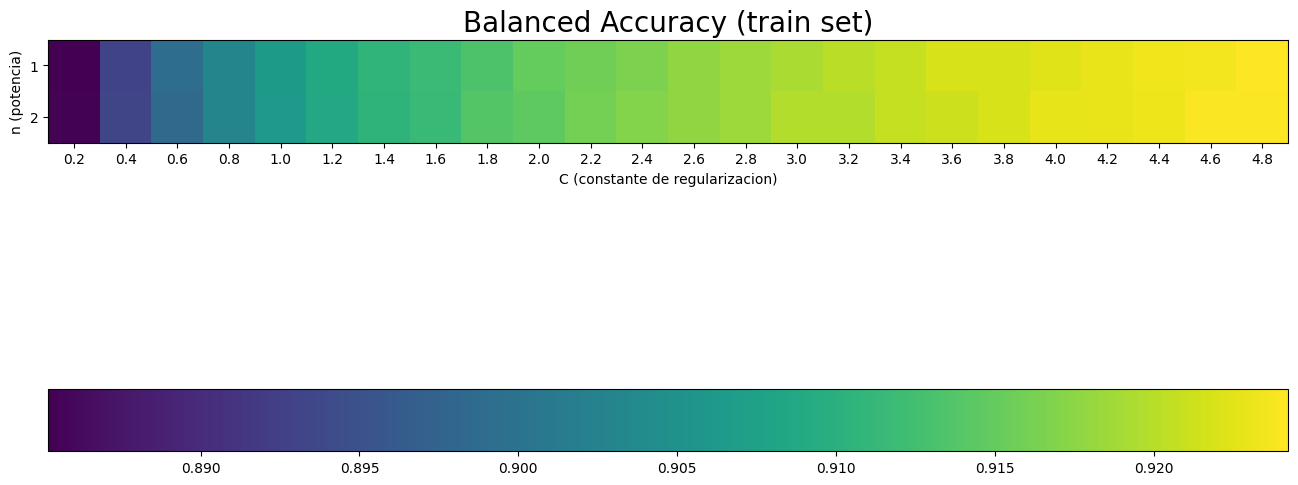

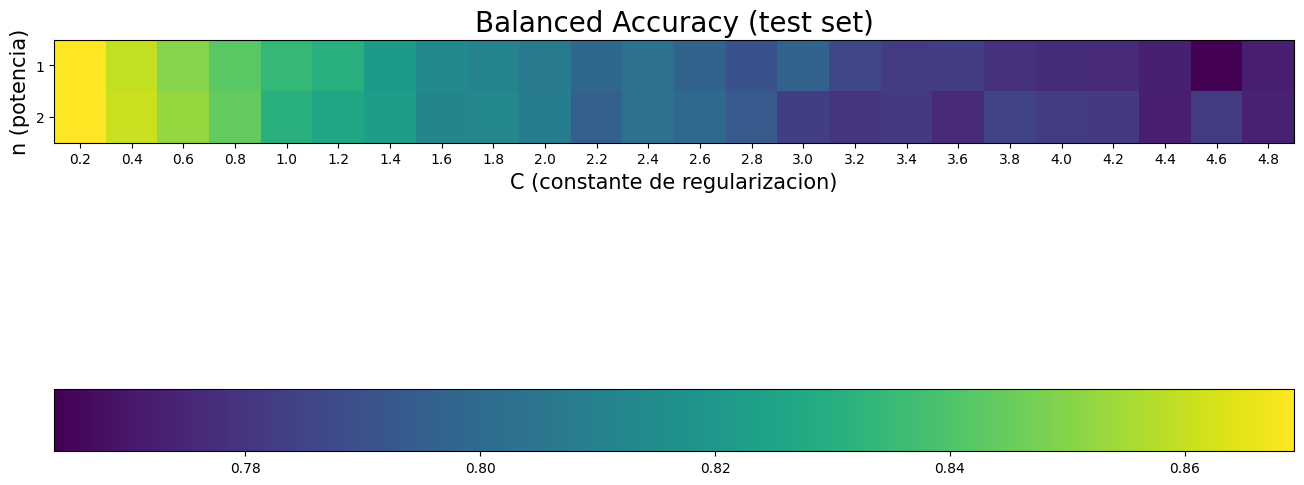

In [37]:
fig, ax = plt.subplots(1,1, figsize=(16,16))  # visualizacion train set
img = ax.imshow(mean_BA_train) # graficamos la matriz
y_label_list = np.round(n_values,2) # estos son los ticks de los ejes
x_label_list = np.round(c_values,2)
ax.set_xticks(np.arange(len(c_values))) # creo los ticks de los ejes
ax.set_yticks(np.arange(len(n_values)))
ax.set_yticklabels(y_label_list) # pongo los ticks de los ejes
ax.set_xticklabels(x_label_list)
plt.xlabel('C (constante de regularizacion)', fontsize=10) # le pongo nombre a ejes y titulo 
plt.ylabel('n (potencia)', fontsize=10)
plt.title('Balanced Accuracy (train set)', fontsize=20)
fig.colorbar(img, orientation="horizontal", pad=0.2) # la barra de colores donde no me moleste

fig, ax = plt.subplots(1,1, figsize=(16,16)) # visualizacion test set, ver comentarios para el caso train, es idéntico
img = ax.imshow(mean_BA_test)
y_label_list = np.round(n_values,2)
x_label_list = np.round(c_values,2)
ax.set_xticks(np.arange(len(c_values)))
ax.set_yticks(np.arange(len(n_values)))
ax.set_yticklabels(y_label_list)
ax.set_xticklabels(x_label_list)
plt.xlabel('C (constante de regularizacion)', fontsize=15)
plt.ylabel('n (potencia)', fontsize=15)
plt.title('Balanced Accuracy (test set)', fontsize=20)
fig.colorbar(img, orientation="horizontal", pad=0.2)

Otra forma de optimizar parametros

In [ ]:
#definimos la semilla
semilla = 42

In [ ]:
# Importamos el modelo
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import  ElasticNet

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

In [ ]:
# Definimos el diccionario con los pasos que queremos que tenga el pipeline en este caso StandardScaler y ElasticNet

pasos = [('scaler', StandardScaler()), ('enet', ElasticNet())]

In [ ]:
# Definimos el objeto que va a contener nuestro pipeline
pipeline = Pipeline(pasos)

In [ ]:
#Definimos la grilla
parametros = {'alpha':[0.001,0.01,0.1,1,10,100],
               'l1_ratio':[0,0.25,0.5,0.75,1]}

In [ ]:
# Definimos el modelo
enet = ElasticNet() 

grid_search = GridSearchCV(estimator = enet, param_grid = parametros, cv = 20, scoring ='neg_mean_squared_error')